## Customer Segmentation using K-Means Clustering

### Problem Statement

### Objective

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import warnings 

warnings.filterwarnings('ignore')

In [95]:
df = pd.read_csv(r"C:\Users\praty\OneDrive\Desktop\Data Anlyst\Latest Portfolio Projects\Credit Card Customer Data.csv")
df.head(5)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [96]:
df.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


In [97]:
df.shape

(660, 7)

In [98]:
df.info

<bound method DataFrame.info of      Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
0        1         87073            100000                   2   
1        2         38414             50000                   3   
2        3         17341             50000                   7   
3        4         40496             30000                   5   
4        5         47437            100000                   6   
..     ...           ...               ...                 ...   
655    656         51108             99000                  10   
656    657         60732             84000                  10   
657    658         53834            145000                   8   
658    659         80655            172000                  10   
659    660         80150            167000                   9   

     Total_visits_bank  Total_visits_online  Total_calls_made  
0                    1                    1                 0  
1                    0                   10    

In [99]:
df.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [100]:
df.dtypes

Sl_No                  int64
Customer Key           int64
Avg_Credit_Limit       int64
Total_Credit_Cards     int64
Total_visits_bank      int64
Total_visits_online    int64
Total_calls_made       int64
dtype: object

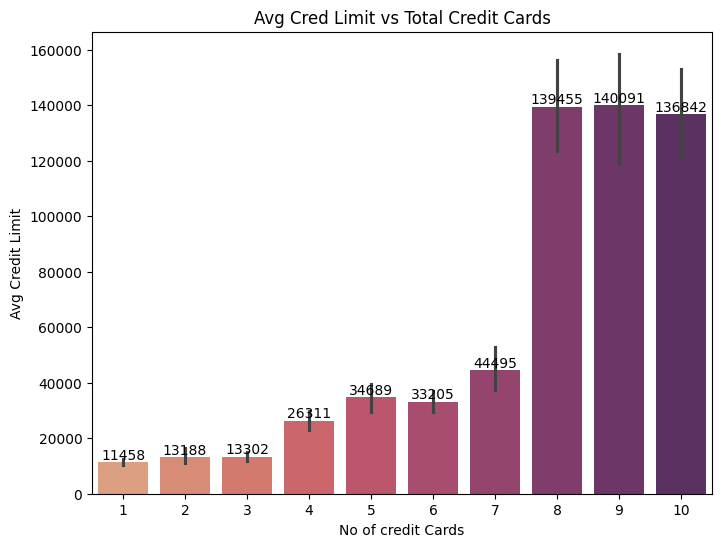

In [101]:
plt.figure(figsize = (8,6))
ax= sns.barplot(x = df['Total_Credit_Cards'], y =df['Avg_Credit_Limit'], palette = 'flare' )
plt.title("Avg Cred Limit vs Total Credit Cards")
plt.xlabel("No of credit Cards")
plt.ylabel("Avg Credit Limit")

for container in ax.containers:
    ax.bar_label(container, fmt = '%.0f')
plt.show()

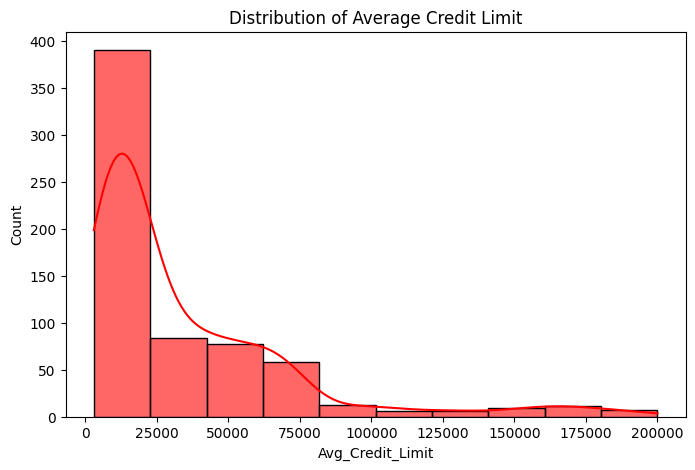

In [102]:
plt.figure(figsize = (8,5))
sns.histplot(df['Avg_Credit_Limit'], bins = 10, kde = 'True', color = 'red', alpha = 0.6)
plt.title("Distribution of Average Credit Limit")
plt.show()

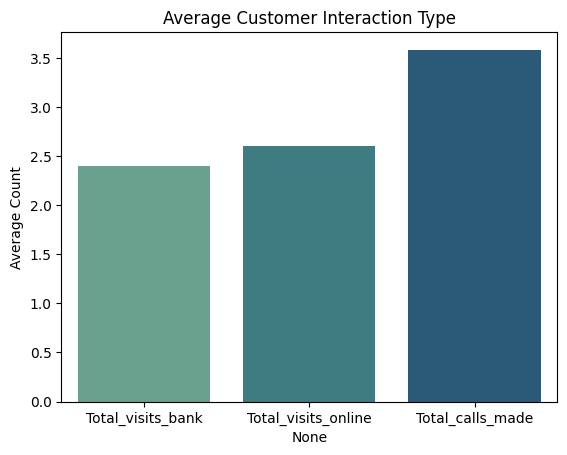

In [110]:
interaction_cols = ['Total_visits_bank', 'Total_visits_online', 'Total_calls_made']
df_mean = df[interaction_cols].mean()
sns.barplot(x=df_mean.index, y=df_mean.values, palette='crest')
plt.title("Average Customer Interaction Type")
plt.ylabel("Average Count")
plt.show()

In [107]:
# Selecting Feature for clusterin
data = df.drop(columns= ['Customer Key','Sl_No'])
num_features = data.select_dtypes(include = ['int64', 'float64']).columns
print("Numberical features used for clustering\n", num_features)

Numberical features used for clustering
 Index(['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made'],
      dtype='object')


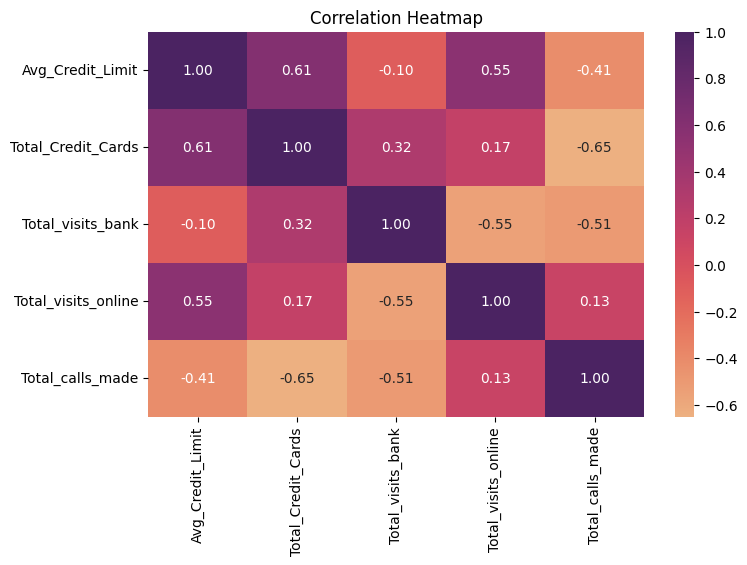

In [109]:
plt.figure(figsize=(8,5))
sns.heatmap(data[num_features].corr(), annot=True, cmap='flare', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

In [111]:
# Feature Scaling 

scaler  = StandardScaler()
scaled_df = scaler.fit_transform(df[num_features])

In [112]:
scaled_df

array([[ 1.74018685, -1.24922476, -0.86045063, -0.54748969, -1.25153737],
       [ 0.41029254, -0.78758515, -1.47373077,  2.5205186 ,  1.89185881],
       [ 0.41029254,  1.05897329, -0.86045063,  0.13428993,  0.1455276 ],
       ...,
       [ 2.93709172,  1.5206129 , -0.86045063,  2.17962879, -0.90227113],
       [ 3.65523464,  2.44389211, -0.86045063,  4.22496765, -1.25153737],
       [ 3.52224521,  1.9822525 , -1.47373077,  3.20229822, -0.55300488]])

In [117]:
inertias = []
sil_scores = []
ks = range(2,11)
for k in ks:
    km = KMeans(n_clusters = k, n_init = 10, random_state = 42)
    labels = km.fit_predict(scaled_df)
    inertias.append(km.inertia_)
    sil_scores.append(silhouette_score(scaled_df,labels))

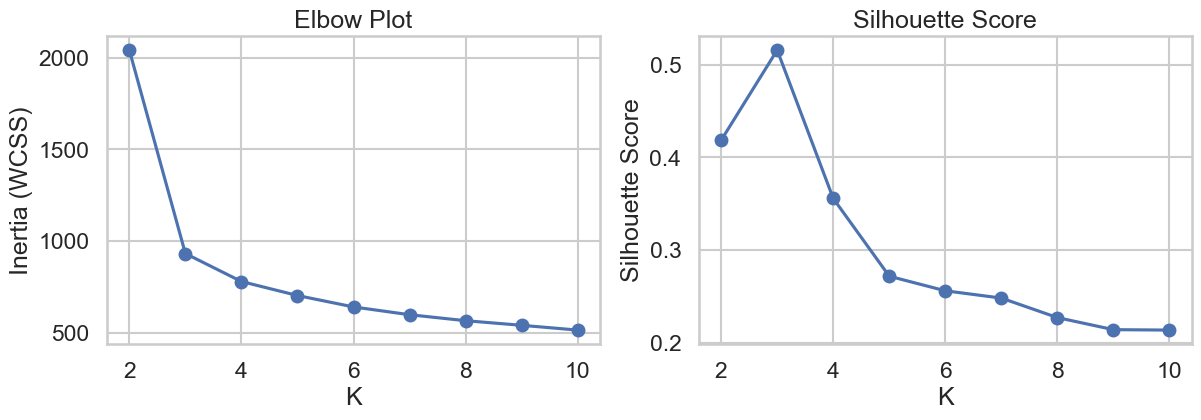

In [122]:
plt.figure(figsize= (14, 4))
plt.subplot(1,2,1)
plt.plot(ks, inertias, '-o')
plt.xlabel("K")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Plot")
plt.grid(True)


plt.subplot(1,2,2)
plt.plot(ks, sil_scores, '-o')
plt.xlabel("K")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score")
plt.grid(True)

plt.show()


In [128]:
optimal_k = 3

kmeans = KMeans(n_clusters = optimal_k, init = 'k-means++', n_init = 20, random_state = 42)
kmeans.fit(scaled_df)

data['cluster'] = kmeans.labels_
data['cluster'].head(5)

0    0
1    2
2    0
3    0
4    1
Name: cluster, dtype: int32

### Evaluation Metrics

In [133]:
print("Inertia (WCSS):", kmeans.inertia_)
print("Silhouette Score: ", silhouette_score(scaled_df, kmeans.labels_))

Inertia (WCSS): 933.0437490000536
Silhouette Score:  0.5157182558881063


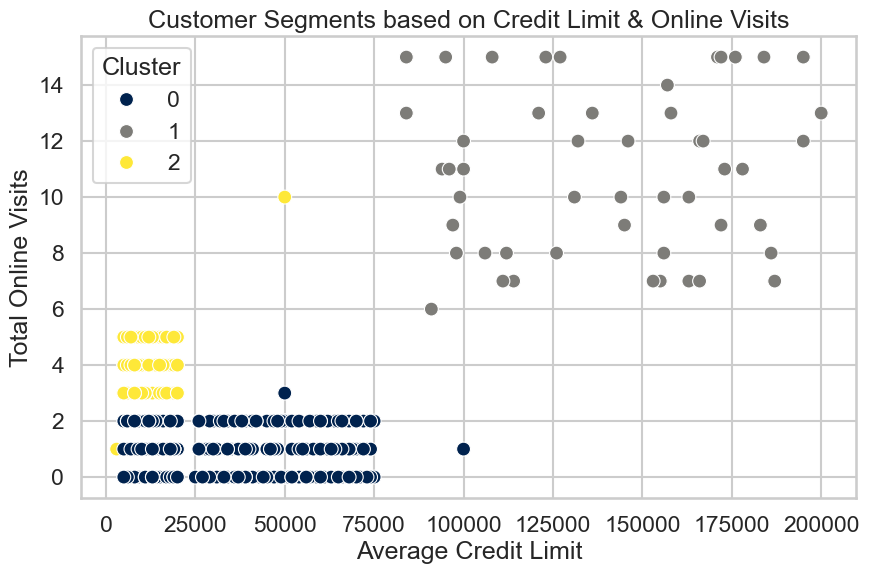

In [143]:
# Select two features for visualization: Avg_Credit_Limit and Total_visits_online
plt.figure(figsize=(10,6))
sns.scatterplot(
    x=data['Avg_Credit_Limit'],
    y=data['Total_visits_online'],
    hue=data['cluster'],
    palette='cividis',
    s=100,
    marker='o'
)

plt.title("Customer Segments based on Credit Limit & Online Visits")
plt.xlabel("Average Credit Limit")
plt.ylabel("Total Online Visits")
plt.legend(title="Cluster")
plt.show()

In [146]:
cluster_profile = data.groupby('cluster').mean(numeric_only = True)
cluster_profile

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
cluster,,,,,
0,33782.383420,5.515544,3.489637,0.981865,2.000000
1,141040.000000,8.740000,0.600000,10.900000,1.080000
2,12174.107143,2.410714,0.933036,3.553571,6.870536


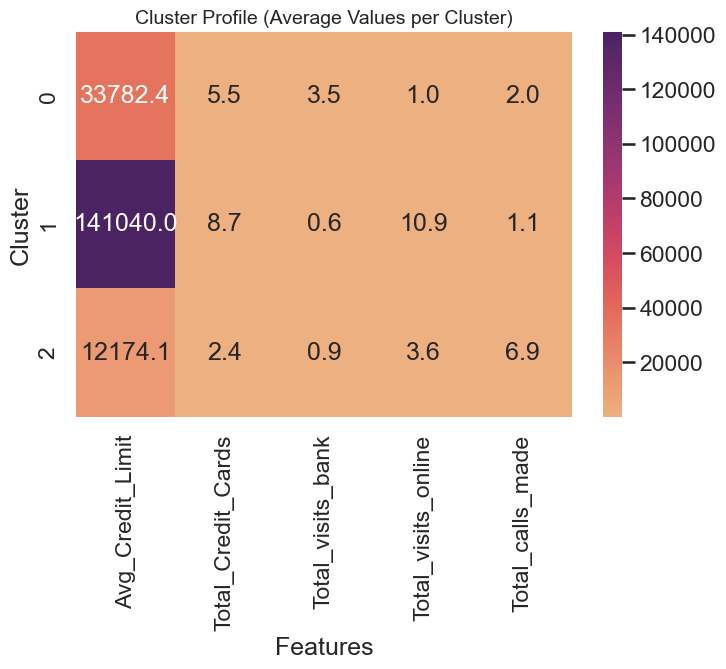

In [155]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.heatmap(cluster_profile, annot=True, fmt=".1f", cmap="flare")
plt.title("Cluster Profile (Average Values per Cluster)", fontsize=14)
plt.xlabel("Features")
plt.ylabel("Cluster")
plt.show()
